<a href="https://colab.research.google.com/github/alirezakhodabakhsh/Tensorflow1.XX-Tutorial/blob/main/Tensorflow_1_XX_Toturial_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===================================================================
# **TENSORFLOW 1.XX  TOTURIAL - Example**
* This notebook implement MLP network on MNIST datasets!
* Written by **Alireza Khodabakhsh**
* alireza.khodabakhsh@ee.sharif.edu
* Aban 1400, October 2021
# ===================================================================

# 1. import library

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import math
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


# 2. import Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

# 3. Train/Test/Valid & One Hot

In [3]:
num_test=x_test.shape[0]
num_valid=int(0.3*x_train.shape[0])
num_train=x_train.shape[0]-num_valid

x_valid=x_train[num_train:]
y_valid=y_train[num_train:]

x_train=x_train[0:num_train]
y_train=y_train[0:num_train]

y_train_hot=tf.Session().run(tf.one_hot(y_train,10))
y_valid_hot=tf.Session().run(tf.one_hot(y_valid,10))
y_test_hot=tf.Session().run(tf.one_hot(y_test,10))
tf.Session().close()

# 4. Shuffle

In [4]:
x_train_shaffle=tf.Session().run(tf.random.shuffle(x_train, seed=12321 ))
y_train_shaffle=tf.Session().run(tf.random.shuffle(y_train_hot, seed=12321))

# 5. HyperParameters

In [5]:
[height,weight]=x_train.shape[1:]
num_class=10
rl=0.01
batchsize=128
normal_std=0.001
num_epoch=20

# 6. Functions that we'll need

In [6]:
def WEIGHTS(shape, name) :
    return tf.get_variable(dtype=tf.float32, shape=shape,name='W_'+name,
                  initializer=tf.truncated_normal_initializer(stddev=normal_std))

In [7]:
def BIAS (shape, name):
    return tf.get_variable(dtype=tf.float32, shape=(shape) , name='B_'+name,
                  initializer=tf.zeros_initializer())

In [8]:
def FC(X, num_units, name, relu=False):
    in_dim=X.get_shape()[1]
    W=WEIGHTS((in_dim, num_units), name)
    B=BIAS ((num_units), name)
    H=tf.matmul(X,W)
    O=tf.add(H,B)
    if relu==True:
        return tf.nn.relu(O), W
    return O, W

# 7. Neural Network ( Graph Phase )

In [9]:
tf.reset_default_graph()

input_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),
                           name='INPUT')

#input_image_norm=tf.image.per_image_standardization(input_image)

x_flatten=tf.layers.flatten(input_image)


H2, W2 =FC(x_flatten, 10, 'FC2', relu=False)


output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                            name='OUTPUT')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


In [10]:
"""
tf.reset_default_graph()

input_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),
                           name='INPUT')

#input_image_norm=tf.image.per_image_standardization(input_image)

x_flatten=tf.layers.flatten(input_image)

FC1, W1 =FC(x_flatten, hidden_num, 'FC1', relu=True)

H2, W2 =FC(FC1, 10, 'FC2', relu=False)


output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                            name='OUTPUT')

"""

"\ntf.reset_default_graph()\n\ninput_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),\n                           name='INPUT')\n\n#input_image_norm=tf.image.per_image_standardization(input_image)\n\nx_flatten=tf.layers.flatten(input_image)\n\nFC1, W1 =FC(x_flatten, hidden_num, 'FC1', relu=True)\n\nH2, W2 =FC(FC1, 10, 'FC2', relu=False)\n\n\noutput_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),\n                            name='OUTPUT')\n\n"

# 8. Neural Network ( Graph Phase ) - Optimization 

In [11]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= H2,
                                            name='LOSS'))
adam=tf.train.GradientDescentOptimizer (
    learning_rate=rl, name='Adam'
).minimize(loss)
accuracy=tf.math.reduce_mean(tf.cast(tf.equal(tf.math.argmax(H2, axis=1),tf.math.argmax(output_image, axis=1)), dtype='float32'))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



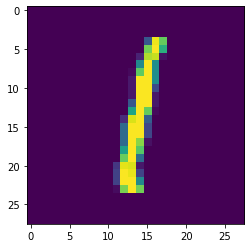

In [12]:
plt.imshow(x_valid[0])

# 9. Neural Network ( Session Phase )  

In [13]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1,num_epoch+1):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f_train={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
                  output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam, feed_dict=f_train)
        if i%100==0:
          L,A=sess.run([loss, accuracy], feed_dict=f_train)
          print('iter {}: \t Loss={:.2f} \t Accuracy:%{:.2f}'.format(i, L, A*100))
          
    f_valid={input_image:x_valid , 
              output_image:y_valid_hot}
    L,A=sess.run([loss, accuracy], feed_dict=f_valid)
    print('--------------------------------------------------')
    print('Epoch:{} \t Loss_Valid:{:.2f} \t Accuracy_Valid:%{:.2f}'.format(epoch, L, A*100))
    print('--------------------------------------------------')

f_test={input_image:x_test , 
          output_image:y_test_hot}
L,A=sess.run([loss, accuracy], feed_dict=f_test)
print('==================================================')
print('==================================================')
print('====== TEST ===================================== ')
print('==================================================')
print('==================================================')
print('Loss_test:{:.2f} \t Accuracy_Test:%{:.2f}'.format(L, A*100))
print('==================================================')
print('==================================================')


W2_trained=sess.run(W2)
sess.close()

====== Epoch=1 =================================== 
iter 0: 	 Loss=1085.31 	 Accuracy:%42.19
iter 100: 	 Loss=35.49 	 Accuracy:%93.75
iter 200: 	 Loss=86.24 	 Accuracy:%88.28
iter 300: 	 Loss=165.19 	 Accuracy:%85.94
--------------------------------------------------
Epoch:1 	 Loss_Valid:517.16 	 Accuracy_Valid:%77.51
--------------------------------------------------
====== Epoch=2 =================================== 
iter 0: 	 Loss=221.34 	 Accuracy:%80.47
iter 100: 	 Loss=44.33 	 Accuracy:%89.84
iter 200: 	 Loss=59.95 	 Accuracy:%89.84
iter 300: 	 Loss=176.01 	 Accuracy:%87.50
--------------------------------------------------
Epoch:2 	 Loss_Valid:159.00 	 Accuracy_Valid:%82.48
--------------------------------------------------
====== Epoch=3 =================================== 
iter 0: 	 Loss=328.07 	 Accuracy:%82.81
iter 100: 	 Loss=32.98 	 Accuracy:%94.53
iter 200: 	 Loss=43.14 	 Accuracy:%88.28
iter 300: 	 Loss=22.16 	 Accuracy:%93.75
--------------------------------------------

# Visualizing Weights

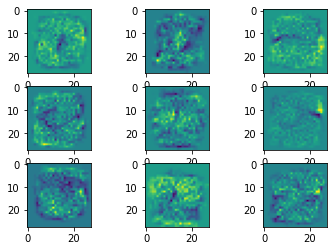

In [14]:
fig, axs = plt.subplots(3,3)
k=0
for i in range(0,3):
  for j in range(0,3):
    img=W2_trained[0:,k].reshape((28,28)) # This code, rehsape the colomns of W2 matrix 
    #indx=(img.max()-img.mean())/5 + img.mean() # This is a index for filtering some pixels (thredshold)
    #axs[i,j].imshow(np.where(img<indx, 0, img)) # This code, replace some pixels with zero (0)
    axs[i,j].imshow(img)
    k=k+1

# Add Hidden Layer to MLP

In [15]:
[height,weight]=x_train.shape[1:]
num_class=10
rl=0.001
batchsize=100
normal_std=0.001
hidden_num=400
num_epoch=20

In [16]:
tf.reset_default_graph()

input_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),
                           name='INPUT')

x_flatten=tf.layers.flatten(input_image)

FC1, W1 =FC(x_flatten, hidden_num, 'FC1', relu=True)

H2, W2 =FC(FC1, 10, 'FC2', relu=False)


output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                            name='OUTPUT')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


In [17]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= H2,
                                            name='LOSS'))
adam=tf.train.GradientDescentOptimizer (
    learning_rate=rl, name='Adam'
).minimize(loss)
accuracy=tf.math.reduce_mean(tf.cast(tf.equal(tf.math.argmax(H2, axis=1),tf.math.argmax(output_image, axis=1)), dtype='float32'))

In [18]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1,num_epoch+1):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f_train={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
                  output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam, feed_dict=f_train)
        if i%100==0:
          L,A=sess.run([loss, accuracy], feed_dict=f_train)
          print('iter {}: \t Loss={:.2f} \t Accuracy:%{:.2f}'.format(i, L, A*100))
          
    f_valid={input_image:x_valid , 
              output_image:y_valid_hot}
    L,A=sess.run([loss, accuracy], feed_dict=f_valid)
    print('--------------------------------------------------')
    print('Epoch:{} \t Loss_Valid:{:.2f} \t Accuracy_Valid:%{:.2f}'.format(epoch, L, A*100))
    print('--------------------------------------------------')

f_test={input_image:x_test , 
          output_image:y_test_hot}
L,A=sess.run([loss, accuracy], feed_dict=f_test)
print('==================================================')
print('==================================================')
print('====== TEST ===================================== ')
print('==================================================')
print('==================================================')
print('Loss_test:{:.2f} \t Accuracy_Test:%{:.2f}'.format(L, A*100))
print('==================================================')
print('==================================================')

W2_trained=sess.run(W2)
W1_trained=sess.run(W1)
sess.close()

====== Epoch=1 =================================== 
iter 0: 	 Loss=2.27 	 Accuracy:%41.00
iter 100: 	 Loss=0.28 	 Accuracy:%92.00
iter 200: 	 Loss=0.19 	 Accuracy:%91.00
iter 300: 	 Loss=0.17 	 Accuracy:%95.00
iter 400: 	 Loss=0.19 	 Accuracy:%96.00
--------------------------------------------------
Epoch:1 	 Loss_Valid:0.25 	 Accuracy_Valid:%93.11
--------------------------------------------------
====== Epoch=2 =================================== 
iter 0: 	 Loss=0.13 	 Accuracy:%96.00
iter 100: 	 Loss=0.11 	 Accuracy:%98.00
iter 200: 	 Loss=0.10 	 Accuracy:%98.00
iter 300: 	 Loss=0.09 	 Accuracy:%97.00
iter 400: 	 Loss=0.14 	 Accuracy:%96.00
--------------------------------------------------
Epoch:2 	 Loss_Valid:0.18 	 Accuracy_Valid:%94.96
--------------------------------------------------
====== Epoch=3 =================================== 
iter 0: 	 Loss=0.08 	 Accuracy:%98.00
iter 100: 	 Loss=0.06 	 Accuracy:%99.00
iter 200: 	 Loss=0.06 	 Accuracy:%98.00
iter 300: 	 Loss=0.05 	 Ac

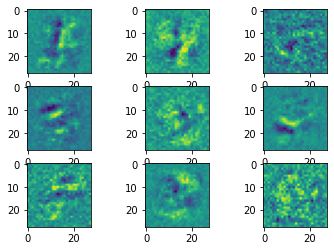

In [19]:
fig, axs = plt.subplots(3,3)
k=0
for i in range(0,3):
  for j in range(0,3):
    img=W1_trained[0:,k].reshape((28,28)) # This code, rehsape the colomns of W2 matrix 
    #indx=(img.max()-img.mean())/5 + img.mean() # This is a index for filtering some pixels (thredshold)
    #axs[i,j].imshow(np.where(img<indx, 0, img)) # This code, replace some pixels with zero (0)
    axs[i,j].imshow(img)
    k=k+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  """
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


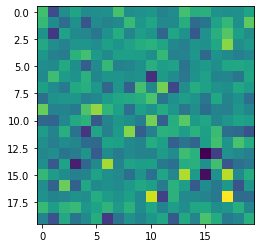

In [20]:
tf.reset_default_graph()

input_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),
                           name='INPUT')
x_flatten=tf.layers.flatten(input_image)

feature_space=tf.matmul(x_flatten,W1_trained)

with tf.Session() as sess:
  out_put=sess.run(feature_space, feed_dict={input_image : x_test})

feature_space_run=out_put.reshape((-1,20,20))

plt.imshow(feature_space_run[2])

In [21]:
y_test[0:11]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0], dtype=uint8)

In [22]:
feature_space_run[2].mean()

1.2377275

0.42322457

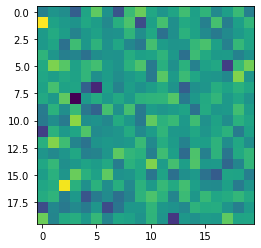

In [23]:
plt.imshow(feature_space_run[7])
feature_space_run[7].mean()

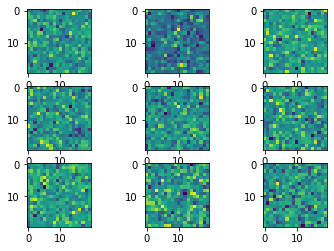

In [24]:
fig, axs = plt.subplots(3,3)
k=0
for i in range(0,3):
  for j in range(0,3):
    img=W2_trained[0:,k].reshape((20,20)) # This code, rehsape the colomns of W2 matrix 
    #indx=(img.max()-img.mean())/5 + img.mean() # This is a index for filtering some pixels (thredshold)
    #axs[i,j].imshow(np.where(img<indx, 0, img)) # This code, replace some pixels with zero (0)
    axs[i,j].imshow(img)
    k=k+1

In [25]:
[height,weight]=x_train.shape[1:]
num_class=10
rl=0.01
batchsize=100
normal_std=0.001
hidden_num_1=400
hidden_num_2=200
num_epoch=20

In [26]:
tf.reset_default_graph()

input_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),
                           name='INPUT')

x_flatten=tf.layers.flatten(input_image)

FC1, W1 =FC(x_flatten, hidden_num_1, 'FC1', relu=True)

FC2, W2 =FC(FC1, hidden_num_2, 'FC2', relu=True)

H2, W3 =FC(FC2, 10, 'FC3', relu=False)


output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                            name='OUTPUT')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


In [27]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= H2,
                                            name='LOSS'))
adam=tf.train.GradientDescentOptimizer (
    learning_rate=rl, name='Adam'
).minimize(loss)
accuracy=tf.math.reduce_mean(tf.cast(tf.equal(tf.math.argmax(H2, axis=1),tf.math.argmax(output_image, axis=1)), dtype='float32'))
cls_prediction = tf.argmax(H2, axis=1, name='predictions')

In [28]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1,num_epoch+1):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f_train={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
                  output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam, feed_dict=f_train)
        if i%100==0:
          L,A=sess.run([loss, accuracy], feed_dict=f_train)
          print('iter {}: \t Loss={:.2f} \t Accuracy:%{:.2f}'.format(i, L, A*100))
          
    f_valid={input_image:x_valid , 
              output_image:y_valid_hot}
    L,A=sess.run([loss, accuracy], feed_dict=f_valid)
    print('--------------------------------------------------')
    print('Epoch:{} \t Loss_Valid:{:.2f} \t Accuracy_Valid:%{:.2f}'.format(epoch, L, A*100))
    print('--------------------------------------------------')

f_test={input_image:x_test , 
          output_image:y_test_hot}
L,A=sess.run([loss, accuracy], feed_dict=f_test)
print('==================================================')
print('==================================================')
print('====== TEST ===================================== ')
print('==================================================')
print('==================================================')
print('Loss_test:{:.2f} \t Accuracy_Test:%{:.2f}'.format(L, A*100))
print('==================================================')
print('==================================================')

cls_pred = sess.run(cls_prediction, feed_dict=f_test)

W2_trained=sess.run(W2)
W1_trained=sess.run(W1)
sess.close()

====== Epoch=1 =================================== 
iter 0: 	 Loss=2.30 	 Accuracy:%14.00
iter 100: 	 Loss=2.04 	 Accuracy:%27.00
iter 200: 	 Loss=0.29 	 Accuracy:%91.00
iter 300: 	 Loss=0.14 	 Accuracy:%97.00
iter 400: 	 Loss=0.12 	 Accuracy:%96.00
--------------------------------------------------
Epoch:1 	 Loss_Valid:0.22 	 Accuracy_Valid:%93.54
--------------------------------------------------
====== Epoch=2 =================================== 
iter 0: 	 Loss=0.09 	 Accuracy:%98.00
iter 100: 	 Loss=0.05 	 Accuracy:%99.00
iter 200: 	 Loss=0.04 	 Accuracy:%100.00
iter 300: 	 Loss=0.03 	 Accuracy:%100.00
iter 400: 	 Loss=0.04 	 Accuracy:%99.00
--------------------------------------------------
Epoch:2 	 Loss_Valid:0.13 	 Accuracy_Valid:%96.15
--------------------------------------------------
====== Epoch=3 =================================== 
iter 0: 	 Loss=0.03 	 Accuracy:%99.00
iter 100: 	 Loss=0.02 	 Accuracy:%100.00
iter 200: 	 Loss=0.02 	 Accuracy:%100.00
iter 300: 	 Loss=0.01 

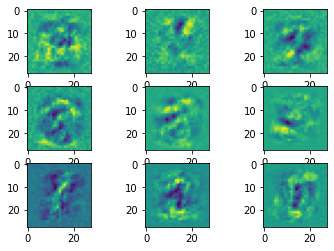

In [29]:
fig, axs = plt.subplots(3,3)
k=0
for i in range(0,3):
  for j in range(0,3):
    img=W1_trained[0:,k].reshape((28,28)) # This code, rehsape the colomns of W2 matrix 
    #indx=(img.max()-img.mean())/5 + img.mean() # This is a index for filtering some pixels (thredshold)
    #axs[i,j].imshow(np.where(img<indx, 0, img)) # This code, replace some pixels with zero (0)
    axs[i,j].imshow(img)
    k=k+1

# Visualize Misclassified

In [30]:
def plot_images(images, cls_true, cls_pred=None, title=None):
    """
    Create figure with 3x3 sub-plots.
    :param images: array of images to be plotted, (9, img_h*img_w)
    :param cls_true: corresponding true labels (9,)
    :param cls_pred: corresponding true labels (9,)
    """
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28, 28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            ax_title = "True: {0}".format(cls_true[i])
        else:
            ax_title = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_title(ax_title)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    if title:
        plt.suptitle(title, size=20)
    plt.show(block=False)

def plot_example_errors(images, cls_true, cls_pred, title=None):
    """
    Function for plotting examples of images that have been mis-classified
    :param images: array of all images, (#imgs, img_h*img_w)
    :param cls_true: corresponding true labels, (#imgs,)
    :param cls_pred: corresponding predicted labels, (#imgs,)
    """
    # Negate the boolean array.
    incorrect = np.logical_not(np.equal(cls_pred, cls_true))

    # Get the images from the test-set that have been
    # incorrectly classified.
    incorrect_images = images[incorrect]

    # Get the true and predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    cls_true = cls_true[incorrect]

    # Plot the first 9 images.
    plot_images(images=incorrect_images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9],
                title=title)

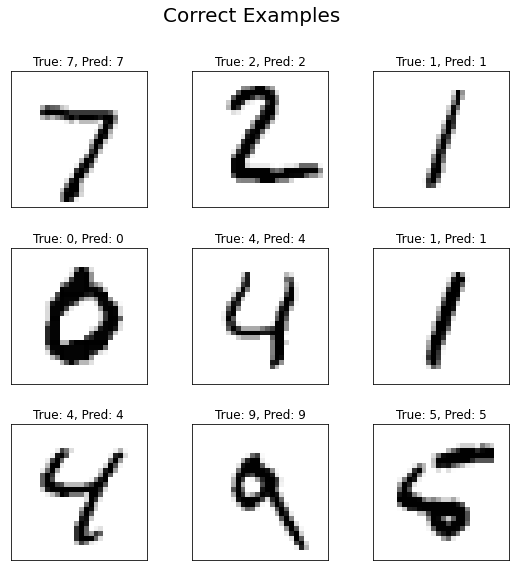

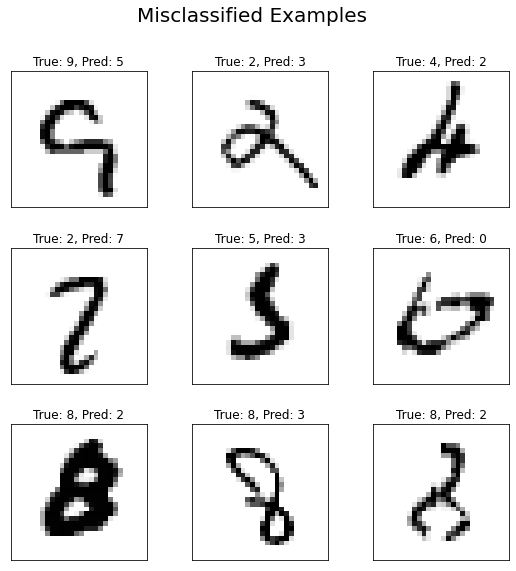

In [31]:
# Plot some of the correct and misclassified examples
cls_true = np.argmax(y_test_hot, axis=1)
plot_images(x_test, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(x_test, cls_true, cls_pred, title='Misclassified Examples')
plt.show()

In [32]:
[height,weight]=x_train.shape[1:]
num_class=10
rl=0.01
batchsize=100
normal_std=0.001
hidden_num_1=400
hidden_num_2=200
hidden_num_3=100
num_epoch=20

In [33]:
tf.reset_default_graph()

input_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),
                           name='INPUT')

x_flatten=tf.layers.flatten(input_image)

FC1, W1 =FC(x_flatten, hidden_num_1, 'FC1', relu=True)

FC2, W2 =FC(FC1, hidden_num_2, 'FC2', relu=True)

FC3, W3 =FC(FC2, hidden_num_3, 'FC3', relu=True)

H2, W4 =FC(FC3, 10, 'FC4', relu=False)


output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                            name='OUTPUT')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


In [34]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= H2,
                                            name='LOSS'))
adam=tf.train.GradientDescentOptimizer (
    learning_rate=rl, name='Adam'
).minimize(loss)
accuracy=tf.math.reduce_mean(tf.cast(tf.equal(tf.math.argmax(H2, axis=1),tf.math.argmax(output_image, axis=1)), dtype='float32'))

In [35]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1,num_epoch+1):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f_train={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
                  output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam, feed_dict=f_train)
        if i%100==0:
          L,A=sess.run([loss, accuracy], feed_dict=f_train)
          print('iter {}: \t Loss={:.2f} \t Accuracy:%{:.2f}'.format(i, L, A*100))
          
    f_valid={input_image:x_valid , 
              output_image:y_valid_hot}
    L,A=sess.run([loss, accuracy], feed_dict=f_valid)
    print('--------------------------------------------------')
    print('Epoch:{} \t Loss_Valid:{:.2f} \t Accuracy_Valid:%{:.2f}'.format(epoch, L, A*100))
    print('--------------------------------------------------')

f_test={input_image:x_test , 
          output_image:y_test_hot}
L,A=sess.run([loss, accuracy], feed_dict=f_test)
print('==================================================')
print('==================================================')
print('====== TEST ===================================== ')
print('==================================================')
print('==================================================')
print('Loss_test:{:.2f} \t Accuracy_Test:%{:.2f}'.format(L, A*100))
print('==================================================')
print('==================================================')

W2_trained=sess.run(W2)
W1_trained=sess.run(W1)
sess.close()

====== Epoch=1 =================================== 
iter 0: 	 Loss=2.30 	 Accuracy:%14.00
iter 100: 	 Loss=2.30 	 Accuracy:%15.00
iter 200: 	 Loss=2.30 	 Accuracy:%15.00
iter 300: 	 Loss=2.30 	 Accuracy:%13.00
iter 400: 	 Loss=2.30 	 Accuracy:%9.00
--------------------------------------------------
Epoch:1 	 Loss_Valid:2.30 	 Accuracy_Valid:%10.79
--------------------------------------------------
====== Epoch=2 =================================== 
iter 0: 	 Loss=2.30 	 Accuracy:%10.00
iter 100: 	 Loss=2.30 	 Accuracy:%15.00
iter 200: 	 Loss=2.30 	 Accuracy:%15.00
iter 300: 	 Loss=2.30 	 Accuracy:%13.00
iter 400: 	 Loss=2.30 	 Accuracy:%9.00
--------------------------------------------------
Epoch:2 	 Loss_Valid:2.30 	 Accuracy_Valid:%10.79
--------------------------------------------------
====== Epoch=3 =================================== 
iter 0: 	 Loss=2.30 	 Accuracy:%10.00
iter 100: 	 Loss=2.30 	 Accuracy:%15.00
iter 200: 	 Loss=2.30 	 Accuracy:%15.00
iter 300: 	 Loss=2.30 	 Accu

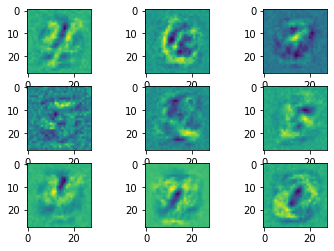

In [36]:
fig, axs = plt.subplots(3,3)
k=0
for i in range(0,3):
  for j in range(0,3):
    img=W1_trained[0:,k].reshape((28,28)) # This code, rehsape the colomns of W2 matrix 
    #indx=(img.max()-img.mean())/5 + img.mean() # This is a index for filtering some pixels (thredshold)
    #axs[i,j].imshow(np.where(img<indx, 0, img)) # This code, replace some pixels with zero (0)
    axs[i,j].imshow(img)
    k=k+1